# Linear Regression with Python

We will be working with a Customers dataset

We'll be trying to predict the yearly amount spent
Let's begin our understanding of implementing Logistic Regression in Python for classification.

This data set contains the following features:

* 'Email': Email of the customer
* 'Address': Address of the customer
* 'Aavtar': Avatar of the customer
* 'Avg Session Lentth': Average length of the Session
* 'Time on App': Time spent on the App 
* 'Time on Website': Time spent on the Website
* 'Length of Membership': Time span of the Membership
* 'Yearly Amount Spent': Yearly amount spent 

In [33]:
# Importing Packages 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split 

In [34]:
# Read the file 
dataframe = pd.read_csv("/Users/devangpapinwar/Downloads/Ecommerce Customers")

In [35]:
# Get Info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [36]:
# Observe Data Patterns 
print(dataframe)

                             Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ...               ...   
495  4483 J

In [37]:
# Numerical data about the Dataframe
dataframe.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [38]:
# Gets the first 5 sets of data
dataframe.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [39]:
# Columns
dataframe.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

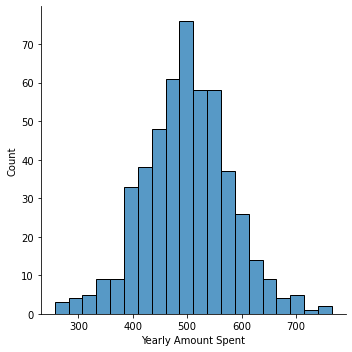

In [40]:
# Used to visualise the parametric distribution of a dataframe
sb.displot(dataframe['Yearly Amount Spent'])

<AxesSubplot:>

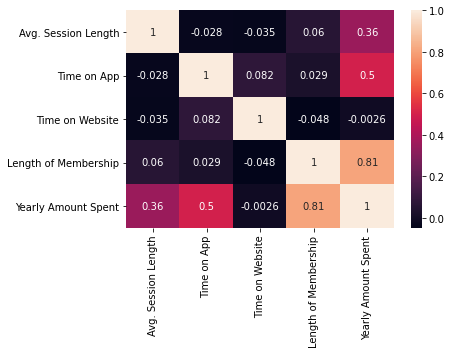

In [41]:
# Gets the heatmap of correlation which quantifies the strength of the linear relationship between a pair of variables
sb.heatmap(dataframe.corr() , annot= True)

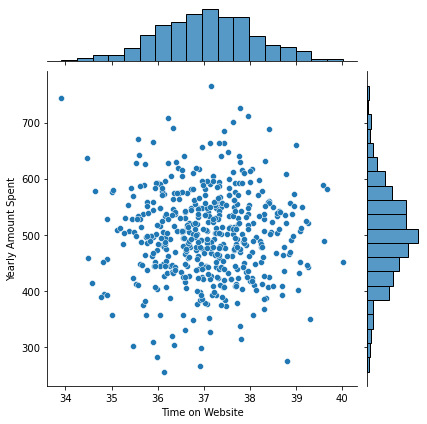

In [42]:
# Used to analyse relationship between 2 variables of a dataframe
sb.jointplot(data = dataframe , x = "Time on Website" , y = "Yearly Amount Spent")

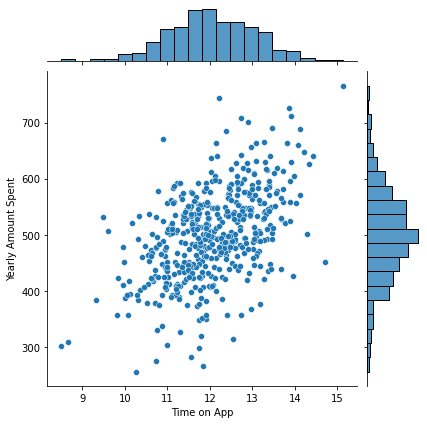

In [43]:
# Used to analyse relationship between 2 variables of a dataframe
sb.jointplot(data = dataframe , x = "Time on App" , y = "Yearly Amount Spent")

In [44]:
dataframe.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [45]:
# Gets the Numerical Analysis Data
X = dataframe[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
print(X)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
0              34.497268    12.655651        39.577668              4.082621
1              31.926272    11.109461        37.268959              2.664034
2              33.000915    11.330278        37.110597              4.104543
3              34.305557    13.717514        36.721283              3.120179
4              33.330673    12.795189        37.536653              4.446308
..                   ...          ...              ...                   ...
495            33.237660    13.566160        36.417985              3.746573
496            34.702529    11.695736        37.190268              3.576526
497            32.646777    11.499409        38.332576              4.958264
498            33.322501    12.391423        36.840086              2.336485
499            33.715981    12.418808        35.771016              2.735160

[500 rows x 4 columns]


In [46]:
# Gets the seperate Response Data
y = dataframe[['Yearly Amount Spent']]
print(y)

     Yearly Amount Spent
0             587.951054
1             392.204933
2             487.547505
3             581.852344
4             599.406092
..                   ...
495           573.847438
496           529.049004
497           551.620145
498           456.469510
499           497.778642

[500 rows x 1 columns]


In [47]:
# Split the Dataset into Test Data and Train Data
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size = 0.3 , random_state = 101)

In [48]:
# Instantiate Linear Regression and fit the the Training Data into the model
regression = linear_model.LinearRegression()
regression.fit(X_train , Y_train)

LinearRegression()

In [49]:
# Get the Intercept and Coefficient values from the regression model 
# Coefficient Vlues are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response
# Intercept is the expected mean value of Y when all X=0
print("Regression CoEfficient : " , regression.coef_)
print("Regression Intercept : " , regression.intercept_)

Regression CoEfficient :  [[25.98154972 38.59015875  0.19040528 61.27909654]]
Regression Intercept :  [-1047.93278225]


In [50]:
# Making predictions based on the Test Data
predictions = regression.predict(X_test)

Text(0, 0.5, 'Predicted Values')

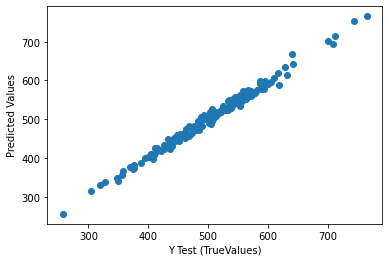

In [51]:
# Graph of 2 sets of data along 2 axes helps understanding the relationship between the them
mpl.scatter(Y_test , predictions)
mpl.xlabel("Y Test (TrueValues)")
mpl.ylabel("Predicted Values")

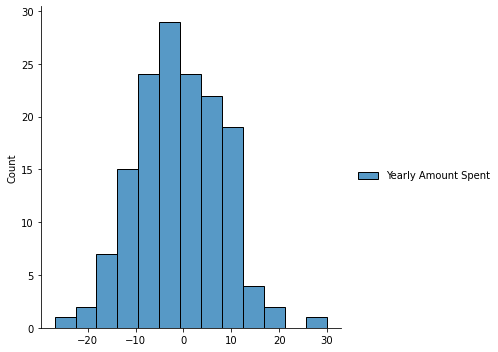

In [52]:
# Used to visualise the parametric distribution of a dataframe
sb.displot(Y_test-predictions)

In [53]:
# Difference between Original and Predicted Values where MAE measures the absolute average distance between the real data and the predicted data, but it fails to punish large errors in prediction and MSE measures the squared average distance between the real data and the predicted data
print("Mean Absolute Error : " , metrics.mean_absolute_error(Y_test , predictions))
print("Mean Squared Error : " , metrics.mean_squared_error(Y_test , predictions))

Mean Absolute Error :  7.228148653430845
Mean Squared Error :  79.81305165097478


In [55]:
# Variance Score is the measure of how far observed values differ from the average of predicted values
print("Varaince Score : " , metrics.explained_variance_score(Y_test , predictions))

Varaince Score :  0.9890771231889606
